#  Python Project - Prosper Loan Dataset
## by  Oluwatomisin Arokodare

## Introduction
The Prosper Loan Dataset is a compilation of information about personal loans provided by Prosper Marketplace, a US-based online lending business. The dataset offers insightful information on a number of loan application-related subjects, borrower profiles, loan performance, and financial indicators.
It provides information on numerous loans, including both approved and unfilled applications, as well as a variety of parameters linked with each loan and borrower.





## Preliminary Wrangling

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
loans=pd.read_csv('Prosper Loan.csv')

In [3]:
loans

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
loans.shape

(113937, 81)

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


> ***Comment:Out of the 113937 rows and 81 columns, I selected only the columns that are related to the exploration analysis of the loan. I chose about 22 columns to investigate. These columns are related to the amount of loan, dates, rates and other charactrestics about the borrowers.***

In [7]:
### Selection of columns based on Prosperloan dataset feature interest
df_loans=loans.loc[:,['Occupation', 'EmploymentStatus','IsBorrowerHomeowner','IncomeRange','LoanOriginalAmount','LoanOriginationDate','LoanStatus',
                'MonthlyLoanPayment','Term','LoanCurrentDaysDelinquent','AmountDelinquent','DelinquenciesLast7Years','Investors',
                'BorrowerState','BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','ProsperRating (Alpha)',
                'LP_ServiceFees','ListingCreationDate','ListingCategory (numeric)']]

In [8]:
df_loans.head()

,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,LoanOriginationDate,LoanStatus,MonthlyLoanPayment,Term,LoanCurrentDaysDelinquent,...,Investors,BorrowerState,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ProsperRating (Alpha),LP_ServiceFees,ListingCreationDate,ListingCategory (numeric)
0,Other,Self-employed,True,"$25,000-49,999",9425,12/09/2007 00:00,Completed,330.43,36,0,...,258,CO,0.16516,0.1580,0.1380,NaN,NaN,-133.18,09:29.3,0
1,Professional,Employed,False,"$50,000-74,999",10000,03/03/2014 00:00,Current,318.93,36,0,...,1,CO,0.12016,0.0920,0.0820,7.0,A,0.00,28:07.9,2
2,Other,Not available,False,Not displayed,3001,17/01/2007 00:00,Completed,123.32,36,0,...,41,GA,0.28269,0.2750,0.2400,NaN,NaN,-24.20,00:47.1,0
3,Skilled Labor,Employed,True,"$25,000-49,999",10000,01/11/2012 00:00,Current,321.45,36,0,...,158,GA,0.12528,0.0974,0.0874,9.0,A,-108.01,02:35.0,16
4,Executive,Employed,True,"$100,000+",15000,20/09/2013 00:00,Current,563.97,36,0,...,20,MN,0.24614,0.2085,0.1985,4.0,D,-60.27,38:39.1,2


In [9]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Occupation                 110349 non-null  object 
 1   EmploymentStatus           111682 non-null  object 
 2   IsBorrowerHomeowner        113937 non-null  bool   
 3   IncomeRange                113937 non-null  object 
 4   LoanOriginalAmount         113937 non-null  int64  
 5   LoanOriginationDate        113937 non-null  object 
 6   LoanStatus                 113937 non-null  object 
 7   MonthlyLoanPayment         113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   LoanCurrentDaysDelinquent  113937 non-null  int64  
 10  AmountDelinquent           106315 non-null  float64
 11  DelinquenciesLast7Years    112947 non-null  float64
 12  Investors                  113937 non-null  int64  
 13  BorrowerState              10

In [10]:
## To check for duplicate values in the dataset
df_loans.duplicated().sum()

0

In [11]:
#To check for null values 
df_loans.isnull().sum()

Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
IncomeRange                      0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanStatus                       0
MonthlyLoanPayment               0
Term                             0
LoanCurrentDaysDelinquent        0
AmountDelinquent              7622
DelinquenciesLast7Years        990
Investors                        0
BorrowerState                 5515
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperScore                 29084
ProsperRating (Alpha)        29084
LP_ServiceFees                   0
ListingCreationDate              0
ListingCategory (numeric)        0
dtype: int64

In [12]:
#Renaming some columns (ProsperRating (Alpha),IsBorrowerHomeowner,LoanOriginalAmount,ListingCreationDate,ListingCreationDate)

df_loans.rename(columns = { 'LoanOriginalAmount': 'LoanAmount',
                           'ListingCategory (numeric)':'ListingCategory',
                            'ProsperRating (Alpha)': 'ProsperRating',
                            'ListingCreationDate': 'ListingDate',
                            'LoanCurrentDaysDelinquent':'CurrentDayDelinquentLoan',
                            'IsBorrowerHomeowner': 'Homeowner'}, inplace = True)

In [13]:
df_loans.head()

,Occupation,EmploymentStatus,Homeowner,IncomeRange,LoanAmount,LoanOriginationDate,LoanStatus,MonthlyLoanPayment,Term,CurrentDayDelinquentLoan,...,Investors,BorrowerState,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ProsperRating,LP_ServiceFees,ListingDate,ListingCategory
0,Other,Self-employed,True,"$25,000-49,999",9425,12/09/2007 00:00,Completed,330.43,36,0,...,258,CO,0.16516,0.1580,0.1380,NaN,NaN,-133.18,09:29.3,0
1,Professional,Employed,False,"$50,000-74,999",10000,03/03/2014 00:00,Current,318.93,36,0,...,1,CO,0.12016,0.0920,0.0820,7.0,A,0.00,28:07.9,2
2,Other,Not available,False,Not displayed,3001,17/01/2007 00:00,Completed,123.32,36,0,...,41,GA,0.28269,0.2750,0.2400,NaN,NaN,-24.20,00:47.1,0
3,Skilled Labor,Employed,True,"$25,000-49,999",10000,01/11/2012 00:00,Current,321.45,36,0,...,158,GA,0.12528,0.0974,0.0874,9.0,A,-108.01,02:35.0,16
4,Executive,Employed,True,"$100,000+",15000,20/09/2013 00:00,Current,563.97,36,0,...,20,MN,0.24614,0.2085,0.1985,4.0,D,-60.27,38:39.1,2


> ***To check the % of missing values and to extract or drop empty values***


In [14]:
## ***To check the % of missing values and to extract or drop empty values***
##Calculate the percentage of missing values in DelinquenciesLast7Years
print(f'{df_loans.DelinquenciesLast7Years.isnull().sum() / len(df_loans.DelinquenciesLast7Years) *100}%')

0.8689012348929671%


In [15]:
## Extract only the rows with no-missing values in DelinquenciesLast7Years and ProsperRating
df_loans= df_loans[df_loans['DelinquenciesLast7Years'].notnull() & df_loans['ProsperRating'].notnull()]


In [16]:
# Confirm changes
df_loans.isnull().sum()

Occupation                  1333
EmploymentStatus               0
Homeowner                      0
IncomeRange                    0
LoanAmount                     0
LoanOriginationDate            0
LoanStatus                     0
MonthlyLoanPayment             0
Term                           0
CurrentDayDelinquentLoan       0
AmountDelinquent               0
DelinquenciesLast7Years        0
Investors                      0
BorrowerState                  0
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
ProsperScore                   0
ProsperRating                  0
LP_ServiceFees                 0
ListingDate                    0
ListingCategory                0
dtype: int64

In [17]:
### Replace missing values in Occupation with Not Available
df_loans['Occupation'] = df_loans['Occupation'].fillna('Not Available')


In [18]:
# To Confirm the changes
df_loans.isnull().sum()

Occupation                  0
EmploymentStatus            0
Homeowner                   0
IncomeRange                 0
LoanAmount                  0
LoanOriginationDate         0
LoanStatus                  0
MonthlyLoanPayment          0
Term                        0
CurrentDayDelinquentLoan    0
AmountDelinquent            0
DelinquenciesLast7Years     0
Investors                   0
BorrowerState               0
BorrowerAPR                 0
BorrowerRate                0
LenderYield                 0
ProsperScore                0
ProsperRating               0
LP_ServiceFees              0
ListingDate                 0
ListingCategory             0
dtype: int64

In [19]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Occupation                84853 non-null  object 
 1   EmploymentStatus          84853 non-null  object 
 2   Homeowner                 84853 non-null  bool   
 3   IncomeRange               84853 non-null  object 
 4   LoanAmount                84853 non-null  int64  
 5   LoanOriginationDate       84853 non-null  object 
 6   LoanStatus                84853 non-null  object 
 7   MonthlyLoanPayment        84853 non-null  float64
 8   Term                      84853 non-null  int64  
 9   CurrentDayDelinquentLoan  84853 non-null  int64  
 10  AmountDelinquent          84853 non-null  float64
 11  DelinquenciesLast7Years   84853 non-null  float64
 12  Investors                 84853 non-null  int64  
 13  BorrowerState             84853 non-null  object 
 14  Borro

### Formating Datatypes

In [20]:
# Change DelinquenciesLast7Years to integer
df_loans['DelinquenciesLast7Years'] = df_loans['DelinquenciesLast7Years'].astype(int)

In [21]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Occupation                84853 non-null  object 
 1   EmploymentStatus          84853 non-null  object 
 2   Homeowner                 84853 non-null  bool   
 3   IncomeRange               84853 non-null  object 
 4   LoanAmount                84853 non-null  int64  
 5   LoanOriginationDate       84853 non-null  object 
 6   LoanStatus                84853 non-null  object 
 7   MonthlyLoanPayment        84853 non-null  float64
 8   Term                      84853 non-null  int64  
 9   CurrentDayDelinquentLoan  84853 non-null  int64  
 10  AmountDelinquent          84853 non-null  float64
 11  DelinquenciesLast7Years   84853 non-null  int32  
 12  Investors                 84853 non-null  int64  
 13  BorrowerState             84853 non-null  object 
 14  Borro

In [22]:
#Adjust datatype for all categorical columns
df_loans['Occupation'] = df_loans['Occupation'].astype('category')
df_loans['BorrowerState'] = df_loans['BorrowerState'].astype('category')
df_loans['LoanStatus'] = df_loans['LoanStatus'].astype('category')
df_loans['ListingCategory'] = df_loans['ListingCategory'].astype('category')
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype('category')
df_loans['ProsperRating'] = df_loans['ProsperRating'].astype('category')

In [23]:
df_loans['Occupation'].value_counts()

Other                          21317
Professional                   10542
Executive                       3468
Computer Programmer             3236
Teacher                         2888
                               ...  
Judge                             22
Student - College Freshman        17
Student - College Sophomore       16
Student - Community College       10
Student - Technical School         2
Name: Occupation, Length: 68, dtype: int64

In [24]:
df_loans['ProsperRating'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

In [25]:
df_loans['IncomeRange'].value_counts()

$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [26]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Occupation                84853 non-null  category
 1   EmploymentStatus          84853 non-null  category
 2   Homeowner                 84853 non-null  bool    
 3   IncomeRange               84853 non-null  object  
 4   LoanAmount                84853 non-null  int64   
 5   LoanOriginationDate       84853 non-null  object  
 6   LoanStatus                84853 non-null  category
 7   MonthlyLoanPayment        84853 non-null  float64 
 8   Term                      84853 non-null  int64   
 9   CurrentDayDelinquentLoan  84853 non-null  int64   
 10  AmountDelinquent          84853 non-null  float64 
 11  DelinquenciesLast7Years   84853 non-null  int32   
 12  Investors                 84853 non-null  int64   
 13  BorrowerState             84853 non-null  cat

In [27]:
df_loans.shape

(84853, 22)

### What is the structure of your dataset?

> **The Prosper Loan dataset contains 113,937 loans and 81 variables on each loans**
------------------------------------------------------------------------------------------------------
> After performing explonatory data analysis on the Prosper Loan dataset,I selected the main features of interest that are neccessary for my analysis:
> ***The dataset for this project has :84853 rows and  22 columns).***

> The dataset contains different datatype (bool(1), category(6), datetime64(2), float64(7), int32(1), int64(4), object(1).Some columns are numeric, we also have categorical variables(both ordinal and nominal) and datetime variables.

### What is/are the main feature(s) of interest in your dataset?
The main features of Interest in the dataset include:

> **Borrower Occupation, Loan Amount, MonthlyLoanPayment,Borrower State,Borrower Rate,Borrower APR, Prosper Score, Credit Score,LoanOriginationDate and LenderYield**


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **Loan Status and Employment status**-Knowing the employment status and status of loans could help in evaluating their performance and default rates.It will also allow me to investigate the amounts of loans that are current, finished, in default, or charged off. This will two will help to identify borrowers who are more likely to default on their loans

> **The Monthly Income and Term (the length of the loan)**- will both be important factors in this situation, it will help determine if borrowers have sufficient income to comfortably cover the monthly payments over the chosen loan duration.

## Univariate Exploration

### Categorical Variables

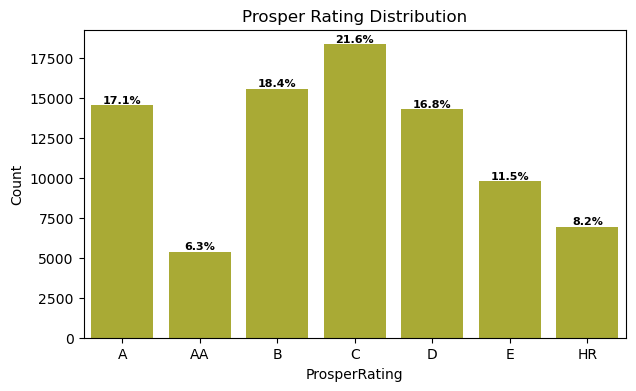

In [28]:
##Prosper Rating Percentage Distribution 
plt.figure(figsize=(7, 4))

ax = sns.countplot(x='ProsperRating', data=df_loans, color=sns.color_palette()[8])

plt.title('Prosper Rating Distribution')
plt.xlabel('ProsperRating')
plt.ylabel('Count')

# Total count of all ratings
total_count = len(df_loans)  

for container in ax.containers:
    for bar in container:
        count = bar.get_height()
        percent = (count * 100) / total_count
        ax.annotate(f'{percent:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=8, color='black',fontweight='bold')

>###### Comment:
**The borrowers prosper ratings of A, B, C, and D correspond to estimated average annual loss ratios of (2.00-3.99%, 4.00-5.99%, 6.00-8.99%, and 9.00-11.99%). Most borrowers get Prosper Rating of 'C' and it has the highest % of 21.62%, this suggests that investors have a 4%–8% chance reduction in expected return, which i think is a worthwhile risk to incur.**

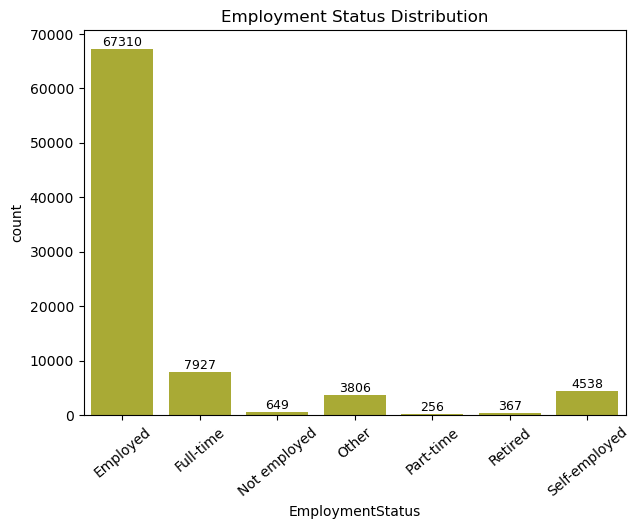

In [29]:
###Employment Status Distribution
plt.figure(figsize=(7, 5))

sns.countplot(data=df_loans, x='EmploymentStatus')
plt.xticks(rotation=40)
plt.title('Employment Status Distribution', size=12)
plt.xlabel('Employment Status', size=10)
plt.ylabel('Count', size=10)

ax = sns.countplot(x='EmploymentStatus', data=df_loans,color=sns.color_palette()[8])
ax.bar_label(ax.containers[0], fmt='%d',fontsize=9,fontweight='light')

plt.show()

>**The Employment Status shows that  most of ProsperLoan  organization borrowers are mostly employed.They should be able to return the loan borrowed after getting paid from their employment**

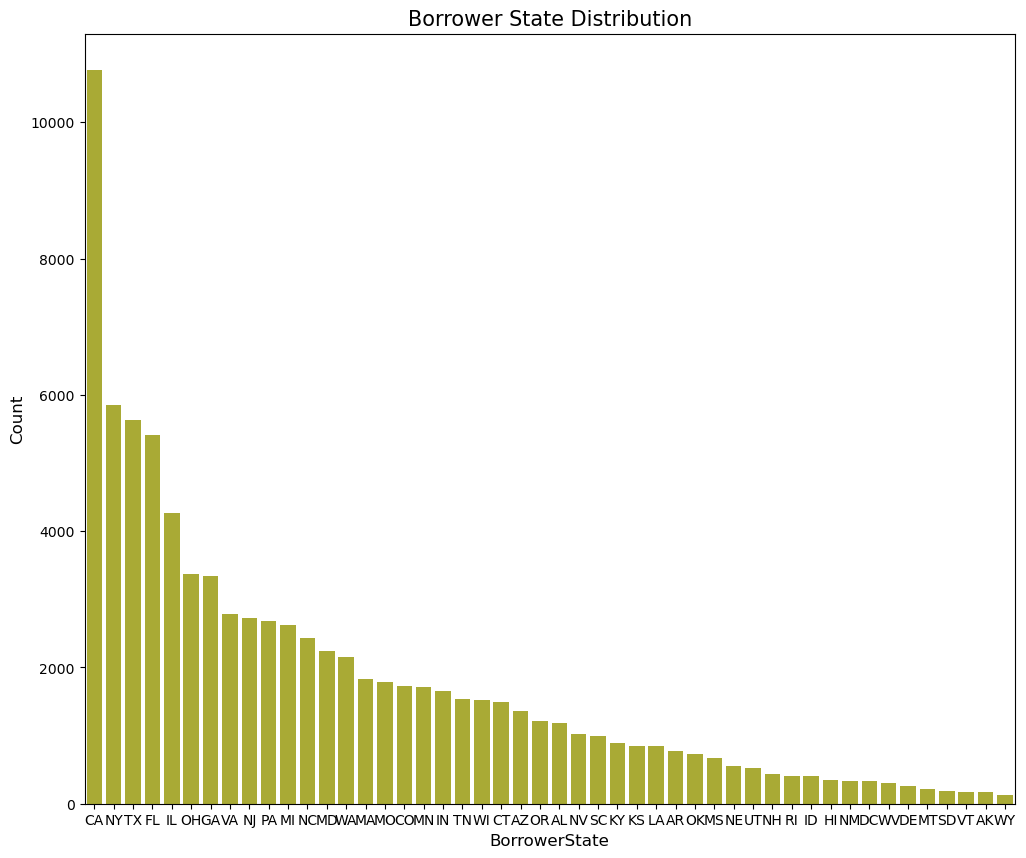

In [30]:
#Borrower State Distribution
cat_order = df_loans['BorrowerState'].value_counts().index
plt.figure(figsize=[12, 10])
sns.countplot(data=df_loans,x='BorrowerState',color=sns.color_palette()[8],order=cat_order);
plt.title('Borrower State Distribution',size=15);
plt.ylabel('Count', size=12)
plt.xlabel('BorrowerState', size=12)
plt.show()

>**Comment:California (CA), Texas (TX),New York (NY) and Florida(FL) have the 4 biggest numbers of loans originated in that period of time.**

In [31]:
df_loans.LoanOriginationDate

1         03/03/2014 00:00
3         01/11/2012 00:00
4         20/09/2013 00:00
5         24/12/2013 00:00
6         18/04/2013 00:00
                ...       
113932    22/04/2013 00:00
113933    07/11/2011 00:00
113934    23/12/2013 00:00
113935    21/11/2011 00:00
113936    21/01/2014 00:00
Name: LoanOriginationDate, Length: 84853, dtype: object

In [32]:
# To Check the datetime column
df_loans['LoanOriginationDate'].str.split(' ', expand=True)

,0,1
1,03/03/2014,00:00
3,01/11/2012,00:00
4,20/09/2013,00:00
5,24/12/2013,00:00
6,18/04/2013,00:00
...,...,...
113932,22/04/2013,00:00
113933,07/11/2011,00:00
113934,23/12/2013,00:00
113935,21/11/2011,00:00


In [33]:
##To reassign the index of date back to the LoanOriginaldate column
df_loans['LoanOriginationDate']=df_loans['LoanOriginationDate'].str.split(' ', expand=True)[0]

In [34]:
df_loans.head(5)

,Occupation,EmploymentStatus,Homeowner,IncomeRange,LoanAmount,LoanOriginationDate,LoanStatus,MonthlyLoanPayment,Term,CurrentDayDelinquentLoan,...,Investors,BorrowerState,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ProsperRating,LP_ServiceFees,ListingDate,ListingCategory
1,Professional,Employed,False,"$50,000-74,999",10000,03/03/2014,Current,318.93,36,0,...,1,CO,0.12016,0.0920,0.0820,7.0,A,0.00,28:07.9,2
3,Skilled Labor,Employed,True,"$25,000-49,999",10000,01/11/2012,Current,321.45,36,0,...,158,GA,0.12528,0.0974,0.0874,9.0,A,-108.01,02:35.0,16
4,Executive,Employed,True,"$100,000+",15000,20/09/2013,Current,563.97,36,0,...,20,MN,0.24614,0.2085,0.1985,4.0,D,-60.27,38:39.1,2
5,Professional,Employed,True,"$100,000+",15000,24/12/2013,Current,342.37,60,0,...,1,NM,0.15425,0.1314,0.1214,10.0,B,-25.33,26:37.1,1
6,Sales - Retail,Employed,False,"$25,000-49,999",3000,18/04/2013,Current,122.67,36,0,...,1,KS,0.31032,0.2712,0.2612,2.0,E,-22.95,52:56.1,1


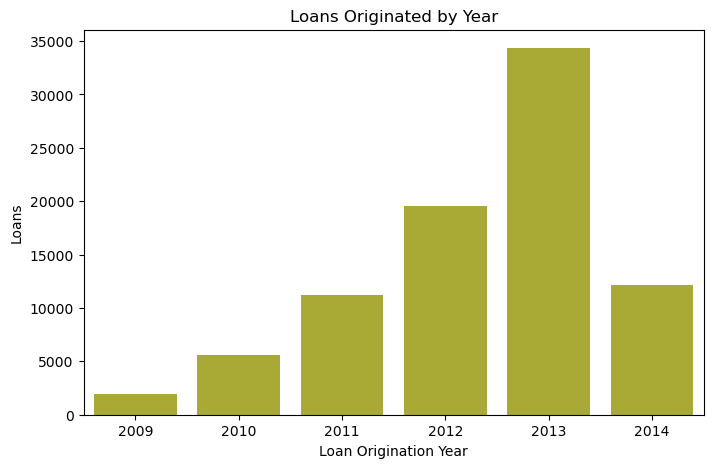

In [35]:
# Loan Origination by Year
df_loans['LoanOriginationDate'] = pd.to_datetime(df_loans['LoanOriginationDate'])
plt.figure(figsize=[8, 5])
sns.countplot(data=df_loans, x=df_loans['LoanOriginationDate'].dt.year,color=sns.color_palette()[8])
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year')
plt.ylabel('Loans')
plt.show()

**>Comment:
** There is a drastic drop in the Loan origination in year 2009 but it started to increase gradually and reached it's peak in year 2013.**

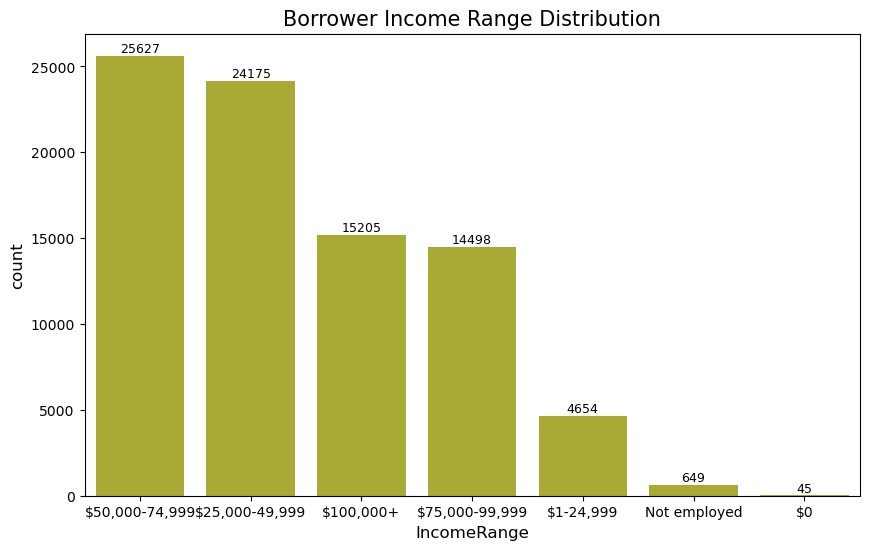

In [36]:
#Borrower Income Range Status Distribution
plt.figure(figsize=[10, 6])
sns.countplot(data=df_loans,x='IncomeRange',color=sns.color_palette()[8])
plt.title('Borrower Income Range Distribution',size=15)
plt.xlabel('Count', size=12)
plt.ylabel('Income Range', size=12)

ax = sns.countplot(x='IncomeRange', data=df_loans,color=sns.color_palette()[8])
ax.bar_label(ax.containers[0], fmt='%d',fontsize=9,fontweight='light')
plt.show()

>**Comment**:
**We can see that people with income range of 50,000-74,999 are the ones who take loans the most**

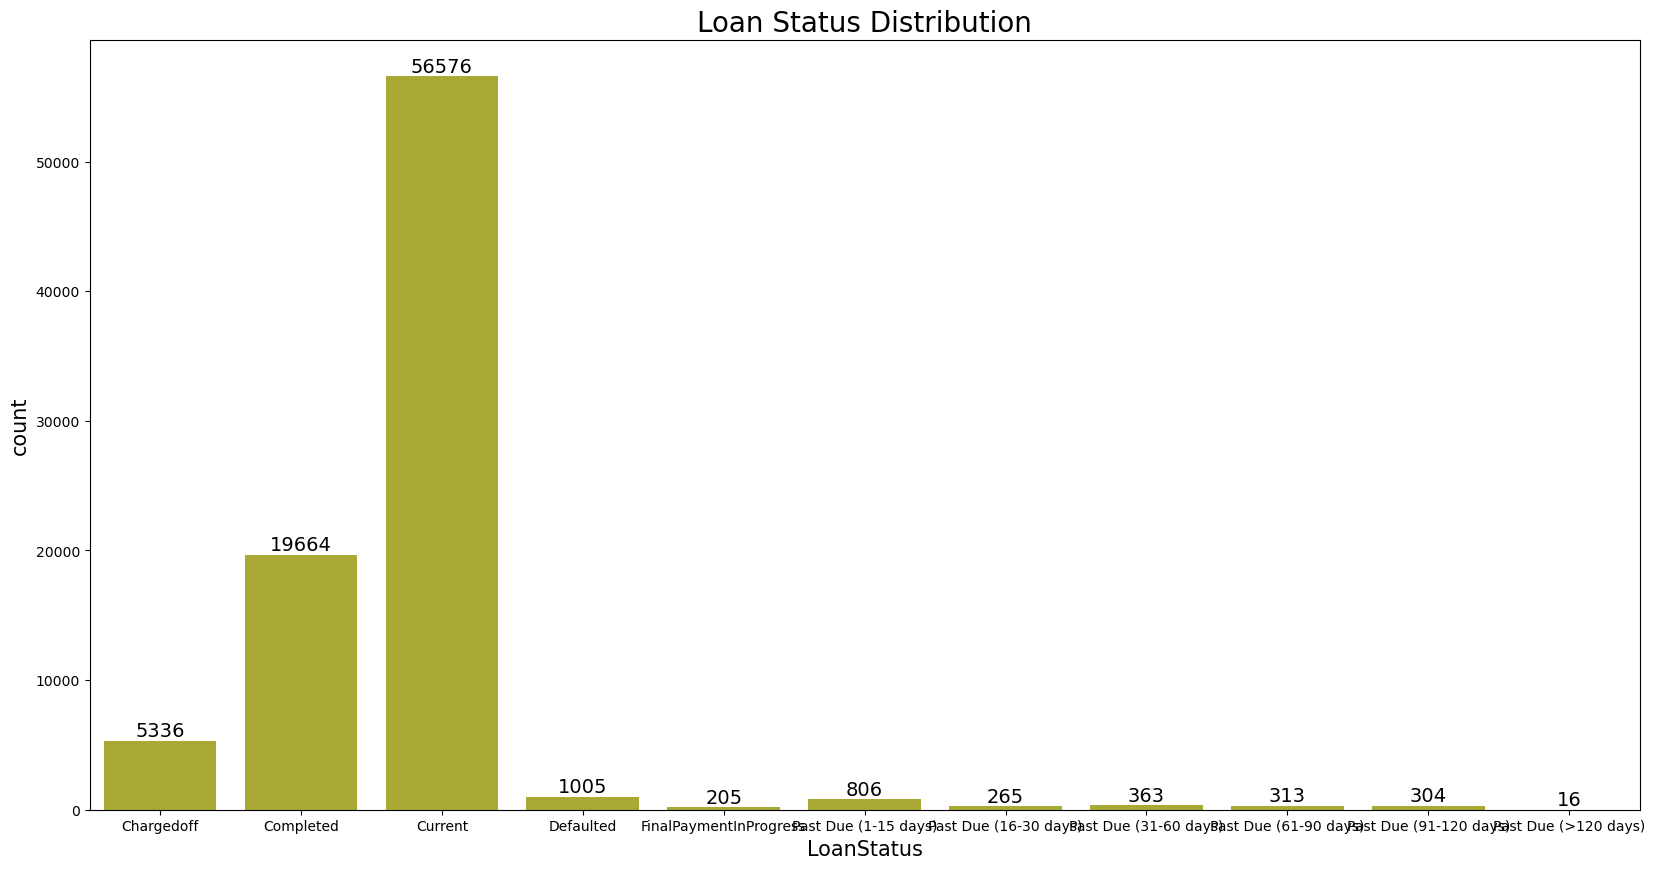

In [37]:
# Loan Status Distribution
plt.figure(figsize=[20, 10])
sns.countplot(data=df_loans,x='LoanStatus',color=sns.color_palette()[8])
plt.title('Loan Status Distribution',size=20)
plt.xlabel('Count', size=15)
plt.ylabel('LoanStatus', size=15)

ax = sns.countplot(x='LoanStatus', data=df_loans,color=sns.color_palette()[8])
ax.bar_label(ax.containers[0], fmt='%d',fontsize=14,fontweight='light')
plt.show()

>**Comment**:
**From the chart,the loan status shows that current loan has higher value and their are limited amount of loan that has been completed and chargedoff**

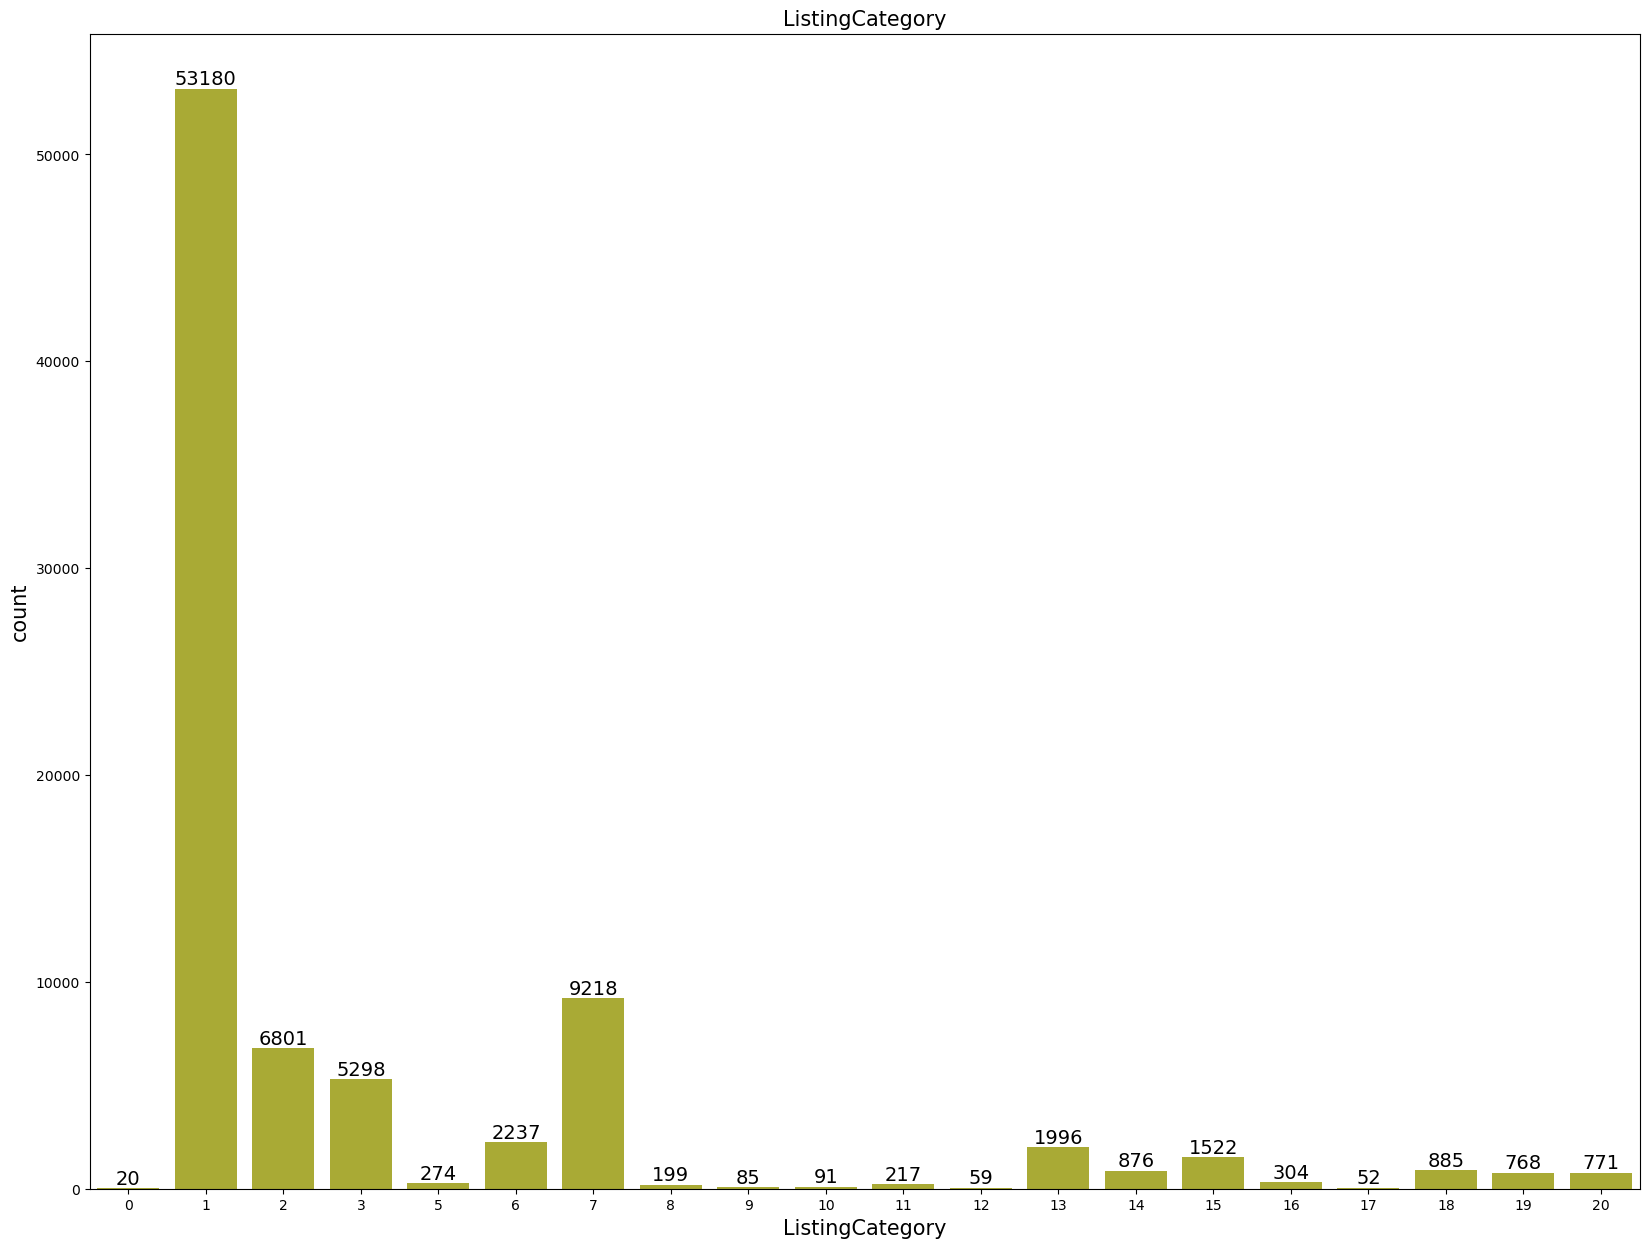

In [38]:
#listingCategory Distribution
plt.figure(figsize=[20, 15])
sns.countplot(data=df_loans,x='ListingCategory',color=sns.color_palette()[8])
plt.title('ListingCategory',size=15)
plt.xlabel('ListingCategory', size=15)
plt.ylabel('count', size=15);
ax = sns.countplot(x='ListingCategory', data=df_loans,color=sns.color_palette()[8])
ax.bar_label(ax.containers[0], fmt='%d',fontsize=14,fontweight='light')
plt.show()

>**Comment**:
**Listingcategory 1 for loan has the highest value**

### QUANTITATIVE VARIABLES

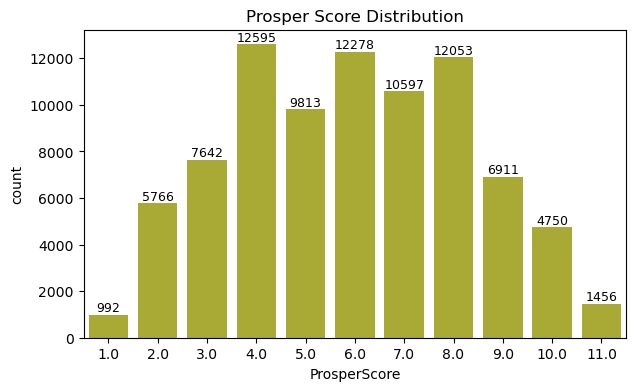

In [39]:
##ProsperSCore Distribution 
plt.figure(figsize=(7, 4))

sns.countplot(data=df_loans, x='ProsperScore')

plt.title('Prosper Score Distribution')
plt.xlabel('ProsperScore')
plt.ylabel('Count')

ax = sns.countplot(x='ProsperScore', data=df_loans,color=sns.color_palette()[8])
ax.bar_label(ax.containers[0], fmt='%d',fontsize=9,fontweight='light')
plt.show()


**Comment:**
>**Prosper Scores are almost normally distributed and score values 4.0, 6.0 and 8.0 are the most common prosper scores.**

In [40]:
#Checking loans' term (expressed in months)
df_loans['Term'].value_counts()

36    58695
60    24545
12     1613
Name: Term, dtype: int64

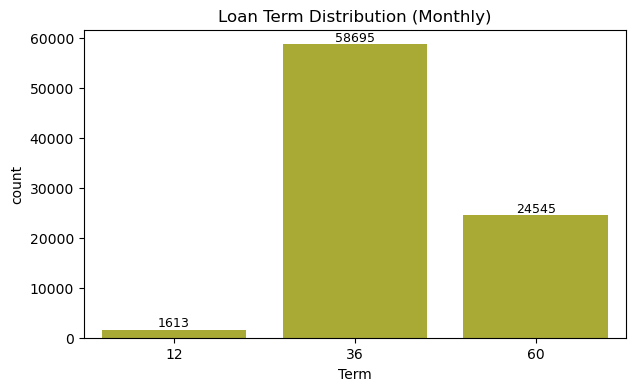

In [41]:
##Loan Term Distribution
plt.figure(figsize=(7, 4))

sns.countplot(data=df_loans, x='Term')

plt.title('Loan Term Distribution (Monthly)')
plt.xlabel('Term (Months)')
plt.ylabel('Count')

ax = sns.countplot(x='Term', data=df_loans,color=sns.color_palette()[8])
ax.bar_label(ax.containers[0], fmt='%d',fontsize=9,fontweight='light')
plt.show()

**Comment:**
>**We can see that loan in years terms can either be 12 month-1year ,36 months-3years or 60 months-5months)
Howevever,we can see that most borrowers take a loan with a term of 36 months (3years).**

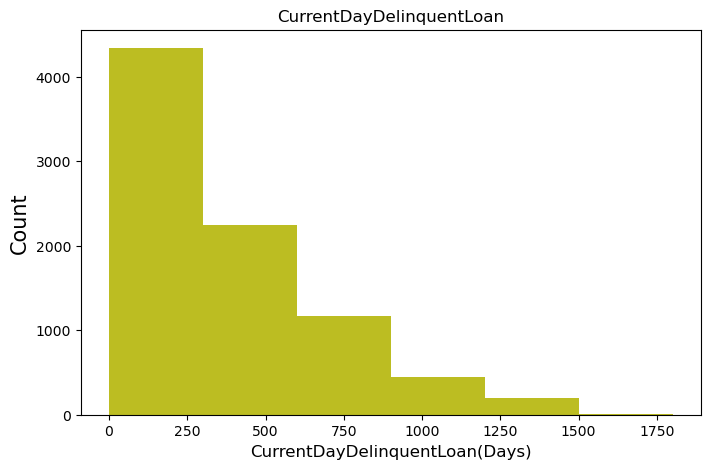

In [42]:
# CurrentDayDelinquentLoan Distribution
binsize =300
bins = np.arange(0, df_loans['CurrentDayDelinquentLoan'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['CurrentDayDelinquentLoan']>0], x = 'CurrentDayDelinquentLoan', bins = bins,color=sns.color_palette()[8])
plt.title('CurrentDayDelinquentLoan')
plt.xlabel('CurrentDayDelinquentLoan(Days)',size=12)
plt.ylabel('Count',size=15)
plt.show()

>**Comment:Most of delinquentloans are on the first 500 days and the distribution is bimodal.**

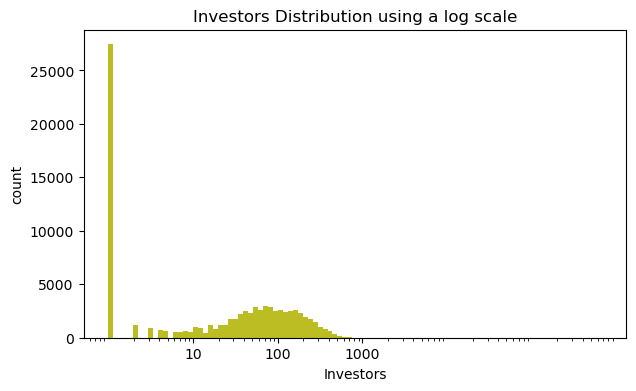

In [43]:
#Number of Investors Distribution on log scale for all loans
log_binsize = 0.05
bins = 15 ** np.arange(0, 5, log_binsize)
plt.figure(figsize=[7, 4])

plt.hist(data = df_loans, x = 'Investors', bins = bins,color=sns.color_palette()[8])
plt.title('Investors Distribution using a log scale',size=12)
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors',size=10)
plt.ylabel('count',size=10)
plt.show()

>**Comment: Most Loans has around 100 investors**

<Figure size 600x500 with 0 Axes>

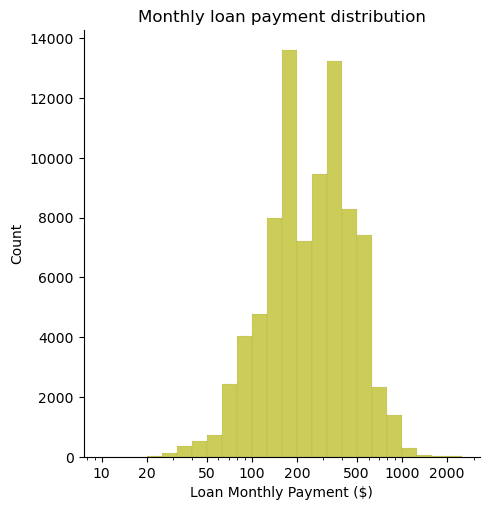

In [44]:
# Monthly loan payment distribution
log_binsize =0.10
bins = 10 ** np.arange(1, np.log10(df_loans['MonthlyLoanPayment'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[6, 5])
sns.displot(data=df_loans, x='MonthlyLoanPayment', bins=bins, color=sns.color_palette()[8])
plt.xscale('log')
plt.xticks([10, 20, 50 ,100, 200, 500, 1e3, 2e3], ['10','20','50','100', '200', '500', '1000', '2000'])
plt.title('Monthly loan payment distribution', size=12)
plt.xlabel('Loan Monthly Payment ($)', size=10)
plt.ylabel('Count', size=10)

plt.show()

>**Comment:The is monthly loan payment distribution is normally distributed with the peak between$100 and 200, I also noticed that some increased at 500**

<Figure size 1000x500 with 0 Axes>

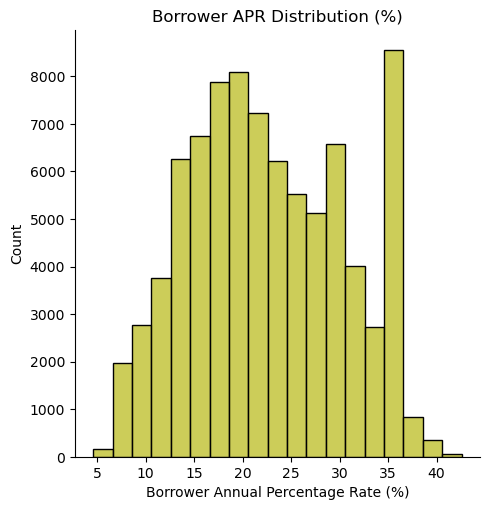

In [45]:
# Distribution of Borrower APR in percentage 
binsize = 2
borrower_APR_percentage = df_loans['BorrowerAPR']*100
bins = np.arange(df_loans['BorrowerAPR'].min()*100, df_loans['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
sns.displot(df_loans, x=borrower_APR_percentage, bins=bins, color=sns.color_palette()[8])
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show();

>**Comment:The Borrower APR is normally distrubuted with the peak between 15 and 20 percent and we also have some addition as it increase at 35 percent**

<Figure size 800x500 with 0 Axes>

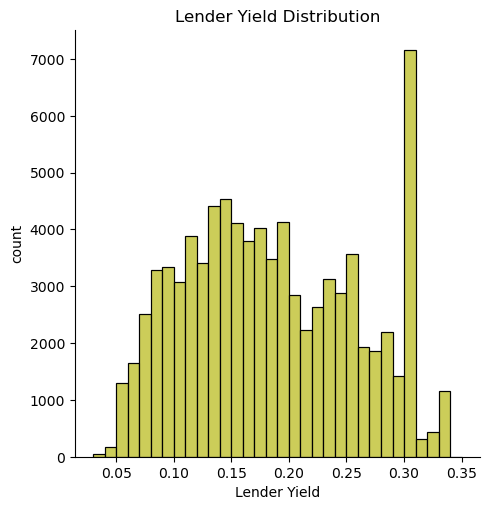

In [46]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(df_loans['LenderYield'].min(), df_loans['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sns.displot(data = df_loans, x = 'LenderYield', bins = bins,color=sns.color_palette()[8])
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()

>**Comment:Lender Yield is nomarlly distributed with most of the values between 0.10 and 0.20, Also, I noticed an increase at 0.30**

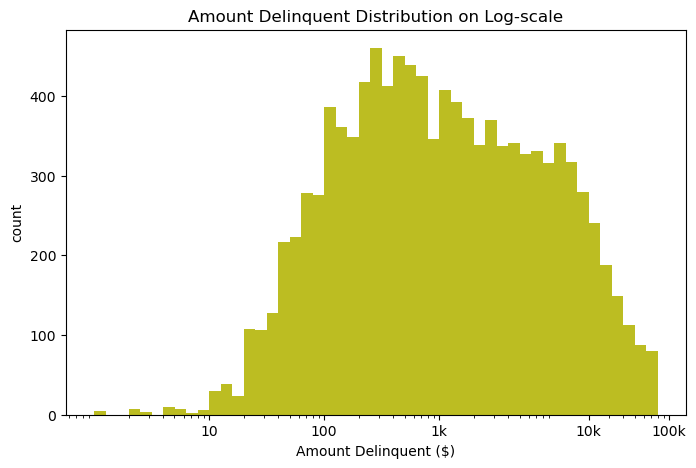

In [47]:
##Amount Delinquent Distribution on Log-scale
log_binsize = 0.10
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'AmountDelinquent', bins = bins,color=sns.color_palette()[8])
plt.title('Amount Delinquent Distribution on Log-scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('count')
plt.show()

>Comment:
**Most amounts delinquent falls around 1K and it is normally distibuted**

<Figure size 1000x500 with 0 Axes>

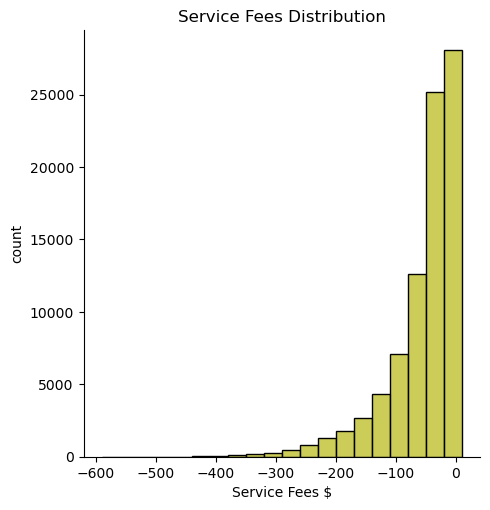

In [48]:
# Service Fees Distribution
binsize = 30
bins = np.arange(df_loans['LP_ServiceFees'].min(), df_loans['LP_ServiceFees'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
sns.displot(data = df_loans, x = 'LP_ServiceFees', bins = bins,color=sns.color_palette()[8])
plt.xlabel('Service Fees $')
plt.title('Service Fees Distribution')
plt.ylabel('count')
plt.show()

>Comment:
**Service fees are left skewed but we can't put it in the log scale because of the negative values.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>**The highest loan creation was in year 2013. California (CA) has the biggest number of loans. 
Service fees was left skewed but I couldn't do the log scale because of negative values.**

>**Loan Original Amount distribution is right skewed and I performed log transformation on it to interpret the visualization.** 

>**I also did the log transformation to these variables: Monthly Loan Payment, Investors and Amount Delinquent.**


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>**The features I investigated has some unusual distributions. However,I performed some operations on the dataset to tidy and change the form of the data.**

>#### Firstly, I adjusted the datatype format for the following columns:(Occupation,BorrowerState,LoanStatus,ListingCategory,EmploymentStatus,ProsperRating) from object and float to category columns, I did this so that i can have

>#### I changed the LoanOriginationdate datatype from object to datetime64.
>#### I changed the DelinquenciesLast7Years datatype from float to integer

>#### I also checked the % of missing values in order to know whether to extract or drop empty values.I noticed that there are some null values in the 2 columns(DelinquenciesLast7Years and ProsperRating),So i extracted the rows with no-missing values in DelinquenciesLast7Years and ProsperRating and used it for my analysis.**

## Bivariate Exploration

>**In this section, I investigated relationships between pairs variables in the dataset,however identified the numeric and categorical features in the dataset in order to select the proper chart type.**

In [49]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Occupation                84853 non-null  category      
 1   EmploymentStatus          84853 non-null  category      
 2   Homeowner                 84853 non-null  bool          
 3   IncomeRange               84853 non-null  object        
 4   LoanAmount                84853 non-null  int64         
 5   LoanOriginationDate       84853 non-null  datetime64[ns]
 6   LoanStatus                84853 non-null  category      
 7   MonthlyLoanPayment        84853 non-null  float64       
 8   Term                      84853 non-null  int64         
 9   CurrentDayDelinquentLoan  84853 non-null  int64         
 10  AmountDelinquent          84853 non-null  float64       
 11  DelinquenciesLast7Years   84853 non-null  int32         
 12  Investors        

In [50]:
numerical_vars = ['LoanAmount', 'IncomeRange','DelinquenciesLast7Years','BorrowerRate','BorrowerAPR','Term',
                  'LenderYield','ProsperScore','AmountDelinquent','LP_ServiceFees', 'Investors','MonthlyLoanPayment']
categorical_vars = ['EmploymentStatus', 'ProsperRating', 'ListingCategory', 'Homeowner', 'LoanStatus', 
                    'BorrowerState', 'Occupation', 'IncomeRange']

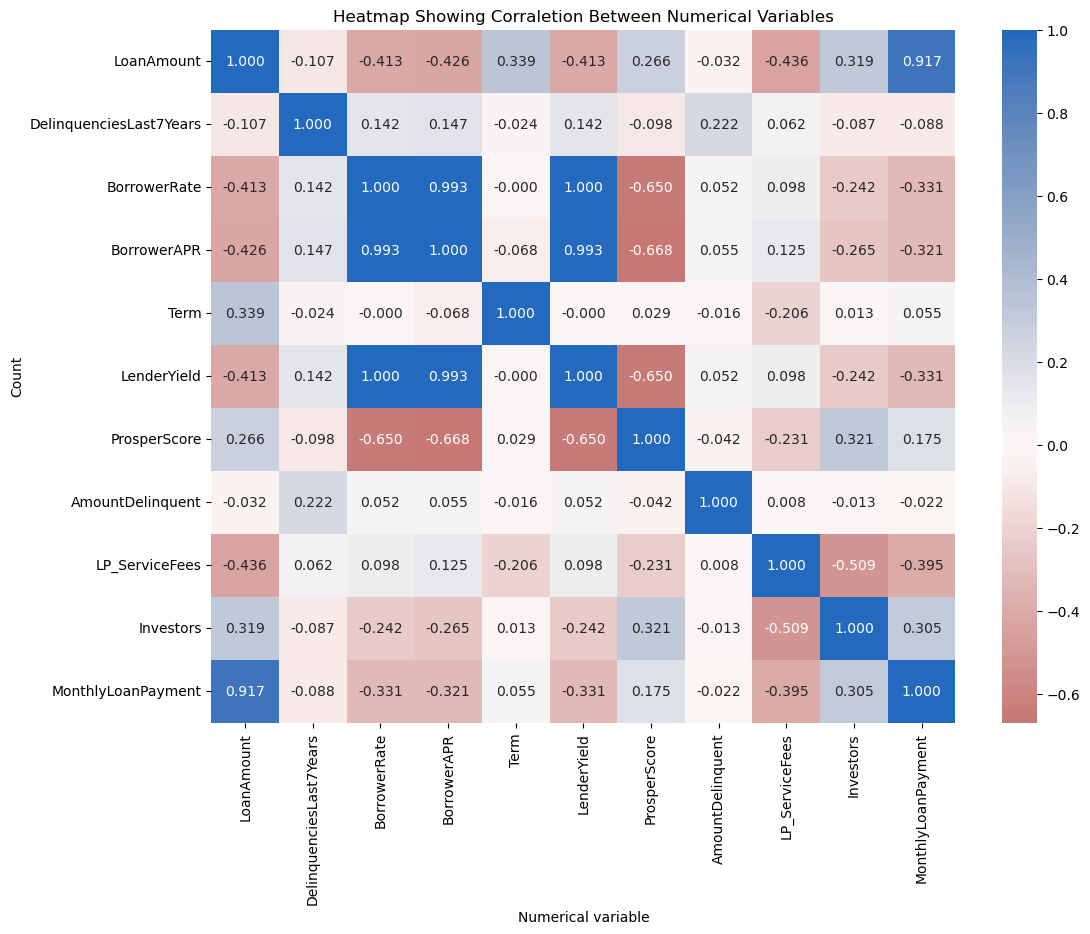

In [51]:
# Plot showing correlation between numerical features 
plt.figure(figsize = [12,9])
sns.heatmap(df_loans[numerical_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Heatmap Showing Corraletion Between Numerical Variables", size = 12)
plt.xlabel('Numerical variable')
plt.ylabel('Count')
plt.show()

>**Comment:Correlation Between Numerical Features
Whenever most variables have a negative correlation with delinquencies, the borrower's rate has a positive correlation with delinquencies. Accordingly, it follows that when these factors rise, the likelihood that the borrower would default on their debt falls, and vice versa.**

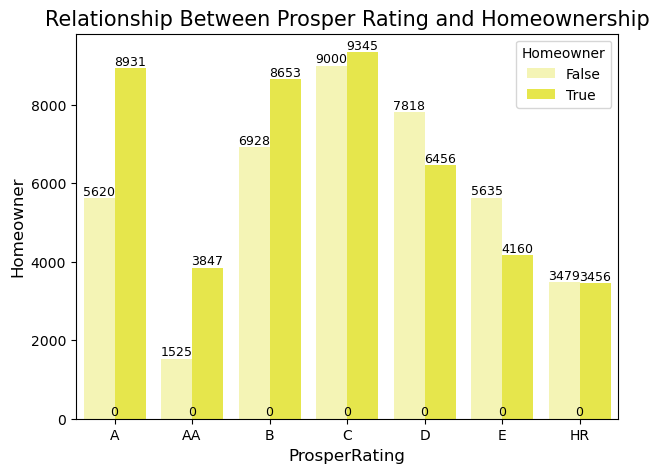

In [52]:
##Relationship Between Prosper Rating and Homeownership
plt.figure(figsize=(7, 5))
palette = sns.color_palette(['#FFFFAA', '#FFFF33', '#FFFF88'])
sns.countplot(data=df_loans, x='ProsperRating',hue='Homeowner',palette=palette)

plt.xlabel("Prosper Rating", size=12)
plt.ylabel("Count", size=12)
plt.title('Relationship Between Prosper Rating and Homeownership', size=15)

ax = sns.barplot(x='ProsperRating', y='Homeowner', data=df_loans)
for container in ax.containers:
    ax.bar_label(container, fmt='%d',fontsize=9,fontweight='light')

plt.show()

>**Comment:From the chart, we can see that the relationship between Prosper Rating and Homeownership shows that prosper loan company has more borrowers who are homeowners for each prosper rating compared to those who are not homeowners**

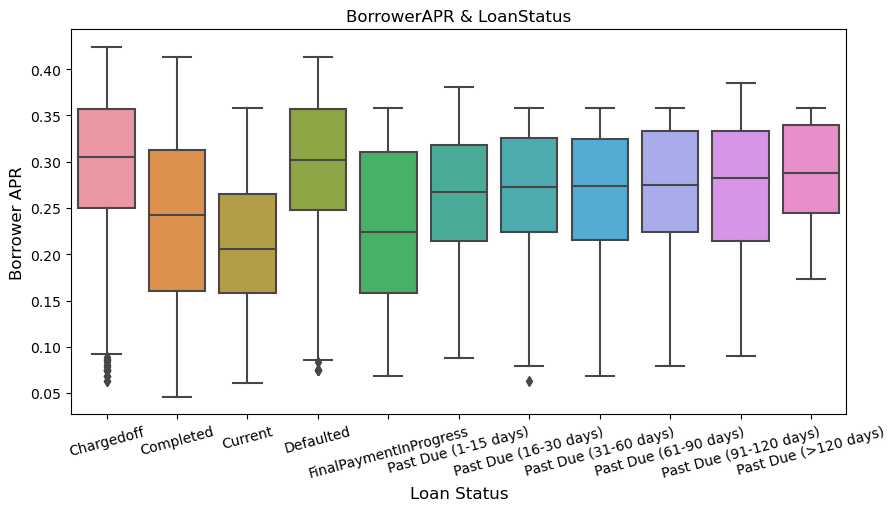

In [53]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [10, 5])
sns.boxplot(data=df_loans,y='BorrowerAPR',x='LoanStatus');
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR',size=12);
plt.xlabel('Loan Status',size=12);
plt.xticks(rotation=15);

>**The BorrowerAPR vs LoanStatus graph shows thatthe current and completed loans have lower rate than the past-due loans**

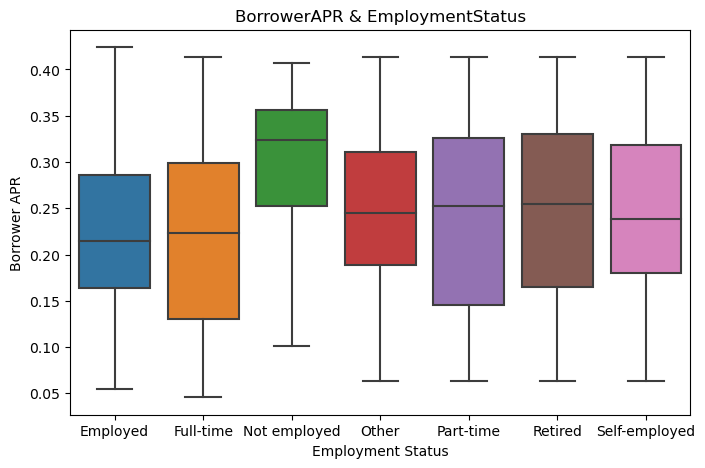

In [54]:
# Borrower APR vs Employment status
plt.figure(figsize = [8, 5])

sns.boxplot(data=df_loans,y='BorrowerAPR',x='EmploymentStatus');
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR',size=10);
plt.xlabel('Employment Status',size=10);

>**Comment:
The Borrower APR vs Employment status graph shows that employed people have lower rate than not employed**

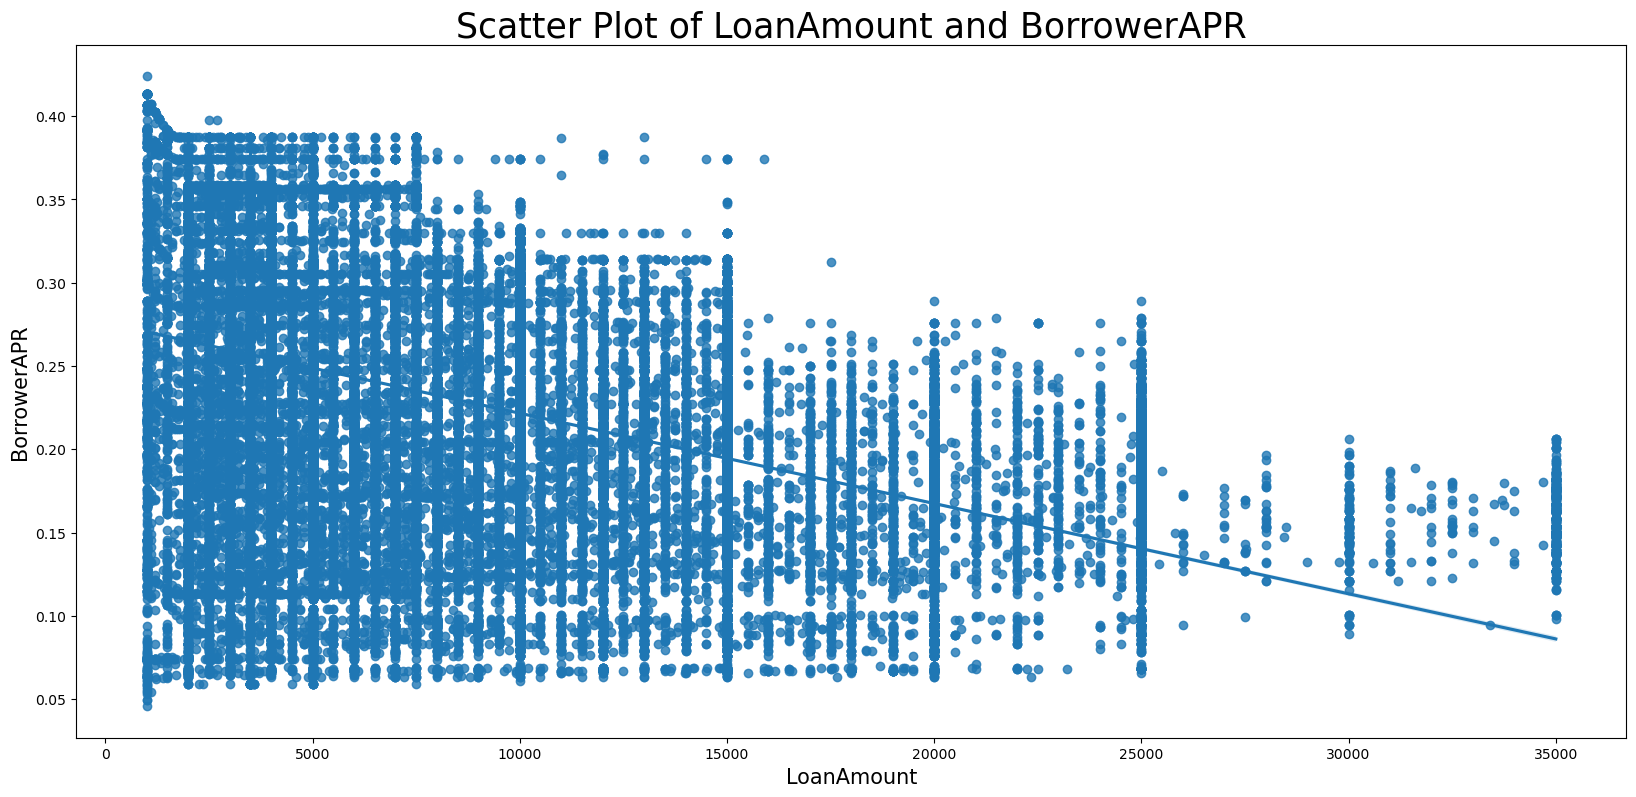

In [55]:
##LoanAmount vs BorrowerAPR
plt.figure(figsize = [20, 9]) 
sns.regplot(data = df_loans, x = 'LoanAmount', y = 'BorrowerAPR')
plt.title('Scatter Plot of LoanAmount and BorrowerAPR',size=25)
plt.xlabel('LoanAmount',size=15)
plt.ylabel('BorrowerAPR',size=15)
plt.show();

>**Comment:There is a negative relationship between loan amount and borrower APR,this means that large loans have relatively less annual interest rate from the borrower.**

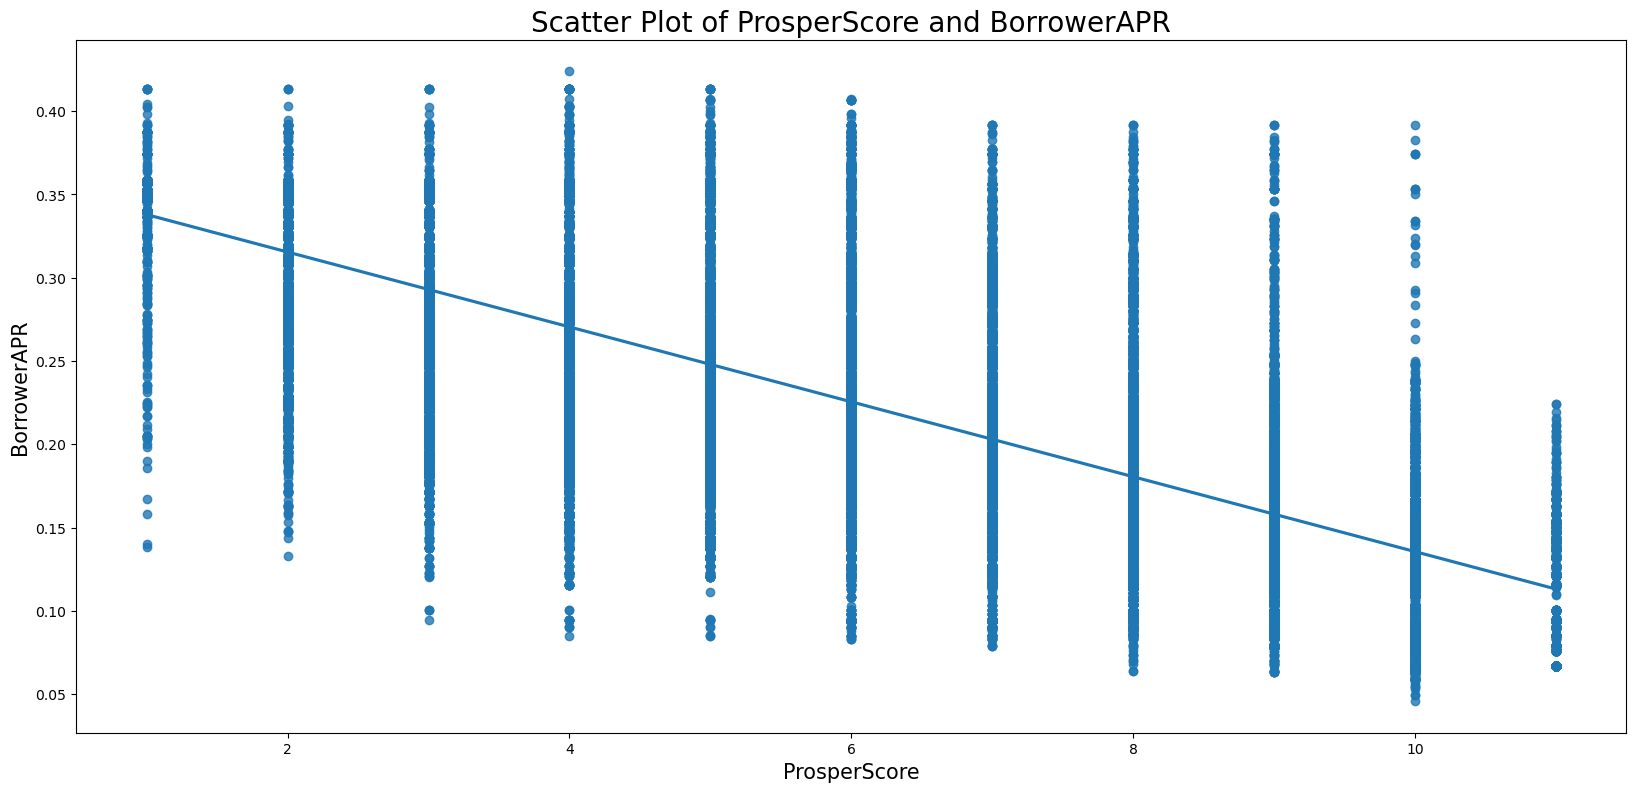

In [56]:
##LoanAmount vs BorrowerAPR
plt.figure(figsize = [20, 9]) 
sns.regplot(data = df_loans, x = 'ProsperScore', y = 'BorrowerAPR',color=sns.color_palette()[0])
plt.title('Scatter Plot of ProsperScore and BorrowerAPR',size=20)
plt.xlabel('ProsperScore',size=15)
plt.ylabel('BorrowerAPR',size=15)
plt.show();

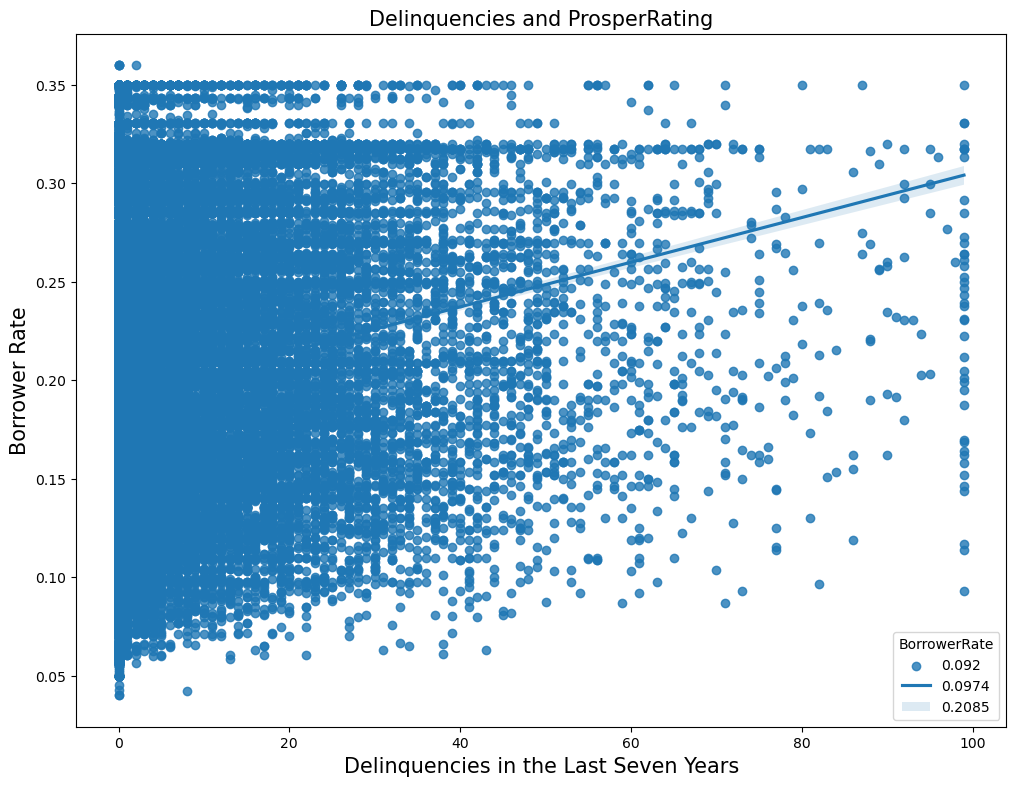

In [57]:
### A plot showing the relationship between Delinquencies and Prosper Rating
cat_markers = df_loans.BorrowerRate
plt.figure(figsize = [12,9])
sns.regplot(data = df_loans,x = 'DelinquenciesLast7Years', y = 'BorrowerRate')

plt.xlabel('Delinquencies in the Last Seven Years', size = 15)
plt.ylabel('Borrower Rate', size = 15)
plt.title('Delinquencies and ProsperRating', size = 15)
plt.legend(cat_markers,title= 'BorrowerRate');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>From the relationship between EmploymentStatus and BorrowerAPR:
Individuals who are not employed receive high interest rate compared to the employed,this means the higher the income, the lower the interest rate.


>Loan amount was at the lowest amount after 2008 financial crisis, however this amount is increases over the year.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Based on the first four high ratings, AA A, B, and C, majority of the borrowers are house owners while the reverse is for low ratings, D and E.

>The loan status for the past dues have a high interest rate.

>Number of Defaulted loans for Self-employed people are larger than those for Not Employed.

>Borrowers with good prosper rating, AA, borrow less frequently and rearly default. The opposite is true for those with bad or poor rating, E and HR.

>ScatterPlot was used to find out that ProsperScore and BorrowerAPR were negatively correlated,the higher the prosper score ,the lower the risk attached. This shows that APR will become lower and this further reduces the yield.

>Most of the varibles are negatively correlated with delinquencies but Borrower's rate, however is possively correlated with delinquencies wich is also much more expected. This implies that as these variables increase, the probability that the borrower won't pay back decreases.

## Conclusion:
>**From the data exploration and insights derived I can conclude that the IncomeRange,loan amount and borrower rate are factors that greatly affect the prosper rating which is a good predictor of delinquency.**

In [59]:
df_loans.to_csv('cleaned_prosperloan_data.csv')